In [1]:
import pandas as pd
import seaborn as sns

sns.set(style='white', color_codes=True)

In [2]:
data_original = pd.read_csv('data.csv')
data = pd.DataFrame.copy(data_original)

In [7]:
data.head()

,ID,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,IDADE
0,1,780,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.86,342.86,428.57,28.57,A,24
1,2,35,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.86,0.00,0.00,0.00,A,27
2,3,54,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.00,0.00,0.00,2857.14,A,29
3,4,35,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.14,285.71,0.00,1428.57,A,29
4,5,883,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.39,0.00,0.00,47471.79,A,45


In [6]:
# Cria coluna IDADE no lugar da coluna DATA_NASCIMENTO

from datetime import date

def calculate_age(born):
    month, day, year = map(int, born.split('/'))
    if year < 17:
        year += 2000
    else:
        year += 1900
    today = date.today()
    return today.year - year - ((today.month, today.day) < (month, day))

data['IDADE'] = map(calculate_age, data['DATA_NASCIMENTO'])

data = data.drop('DATA_NASCIMENTO', axis=1)

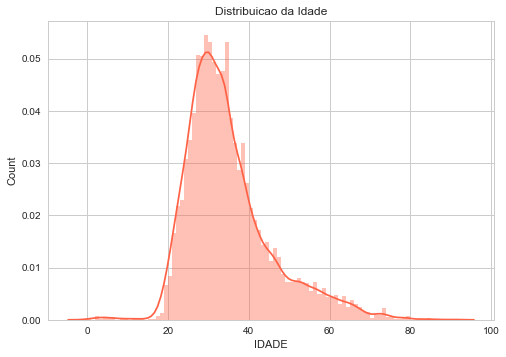

In [8]:
sns.set_style("whitegrid")
sns.distplot(data['IDADE'], bins=91, color='tomato')
sns.plt.title("Distribuicao da Idade")
sns.plt.ylabel("Count")
sns.plt.show()

In [10]:
data['ESTADO_CIVIL'].value_counts()

SOLTEIRO(A)                                    2584
CASADO(A) COM BRASILEIRO(A) NATO(A)            1870
UNIAO ESTAVEL                                   267
DIVORCIADO(A)                                   164
VIUVO(A)                                         35
CASADO(A) COM ESTRANGEIRO(A)                     20
DESQUITADO(A)                                    19
CASADO(A) COM BRASILEIRO(A) NATURALIZADO(A)      13
Name: ESTADO_CIVIL, dtype: int64

In [12]:
#SOLTEIRO(A)                                    2584
#CASADO(A) COM BRASILEIRO(A) NATO(A)            1870
#UNIAO ESTAVEL                                   267
#DIVORCIADO(A)                                   164
#VIUVO(A)                                         35
#CASADO(A) COM ESTRANGEIRO(A)                     20
#DESQUITADO(A)                                    19
#CASADO(A) COM BRASILEIRO(A) NATURALIZADO(A)      13

# Agrupo algumas categorias pois são parecidas e tem pouco exemplares de cada

data['SOLTEIRO'] = (data['ESTADO_CIVIL'] == 'SOLTEIRO(A)')
data['CASADO'] = ((data['ESTADO_CIVIL'] == 'CASADO(A) COM BRASILEIRO(A) NATO(A)') | (data['ESTADO_CIVIL'] == 'CASADO(A) COM ESTRANGEIRO(A)') | (data['ESTADO_CIVIL'] == 'CASADO(A) COM BRASILEIRO(A) NATURALIZADO(A)'))
data['UNIAO_ESTAVEL'] = (data['ESTADO_CIVIL'] == 'UNIAO ESTAVEL')
data['DIVORCIADO'] = ((data['ESTADO_CIVIL'] == 'DIVORCIADO(A)') | (data['ESTADO_CIVIL'] == 'DESQUITADO(A)'))
data['VIUVO'] = (data['ESTADO_CIVIL'] == 'VIUVO(A)')

In [13]:
# Converte sexo e perfil para variáveis booleanas

data['GENERO_BOOL'] = (data['GENERO'] == 'M')
data['PERFIL_A'] = (data['PERFIL'] == 'A')
data['PERFIL_B'] = (data['PERFIL'] == 'B')
data['PERFIL_C'] = (data['PERFIL'] == 'C')
data['PERFIL_D'] = (data['PERFIL'] == 'D')

In [21]:
# Remove colunas que não serão utilizadas
data = data.drop(['GEO_REFERENCIA', 'PROFISSAO', 'GENERO', 'ESTADO_CIVIL', 'PERFIL'], axis=1)
data.head()

,ID,VALOR_01,VALOR_02,VALOR_03,VALOR_04,IDADE,SOLTEIRO,CASADO,UNIAO_ESTAVEL,DIVORCIADO,VIUVO,GENERO_BOOL,PERFIL_A,PERFIL_B,PERFIL_C,PERFIL_D
0,1,342.86,342.86,428.57,28.57,24,True,False,False,False,False,True,True,False,False,False
1,2,942.86,0.00,0.00,0.00,27,True,False,False,False,False,False,True,False,False,False
2,3,2000.00,0.00,0.00,2857.14,29,True,False,False,False,False,True,True,False,False,False
3,4,857.14,285.71,0.00,1428.57,29,False,True,False,False,False,True,True,False,False,False
4,5,8615.39,0.00,0.00,47471.79,45,False,True,False,False,False,True,True,False,False,False


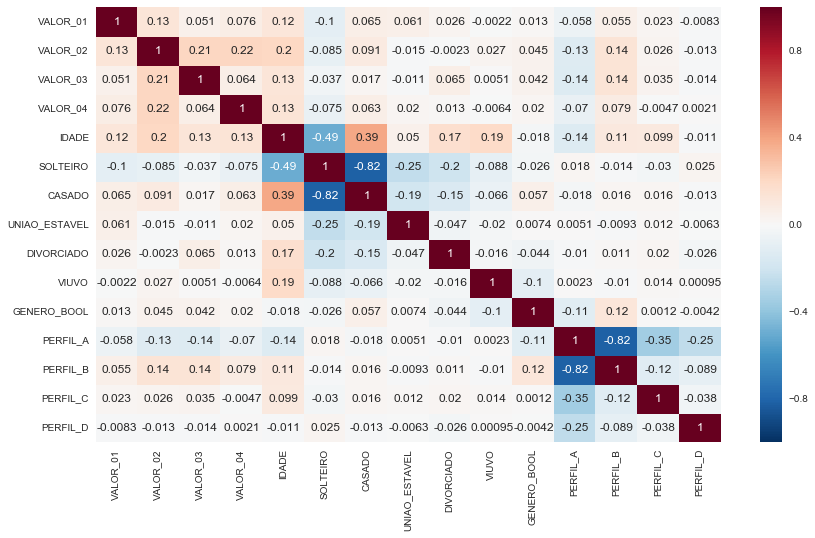

In [22]:
# Dando uma olhada geral na correlação entre as variáveis é possível perceber que
# os valores tem alto grau de correlação entre si, assim como a idade e o estado
# civil estão relacionados.

sns.plt.figure(figsize=(14,8))
sns.heatmap(data.drop(['ID'], axis=1).corr(), annot=True)
sns.plt.show()

In [77]:
# Normaliza features para rodar algoritmo de clusterização

from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform( data.drop('ID', axis=1).values ))
data_scaled.columns = data.columns.values[1:]
data_scaled

,VALOR_01,VALOR_02,VALOR_03,VALOR_04,IDADE,SOLTEIRO,CASADO,UNIAO_ESTAVEL,DIVORCIADO,VIUVO,GENERO_BOOL,PERFIL_A,PERFIL_B,PERFIL_C,PERFIL_D
0,0.000857,0.000120,0.000300,0.000042,0.263736,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.002357,0.000000,0.000000,0.000000,0.296703,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.005000,0.000000,0.000000,0.004167,0.318681,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.002143,0.000100,0.000000,0.002083,0.318681,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.021538,0.000000,0.000000,0.069230,0.494505,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,0.001429,0.000144,0.000000,0.000083,0.329670,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.000857,0.000000,0.000000,0.000000,0.296703,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,0.003571,0.000000,0.000000,0.000000,0.285714,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.001071,0.000000,0.000000,0.000000,0.461538,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.007143,0.088625,0.000000,0.112083,0.395604,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [106]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4).fit(data_scaled)

In [109]:
data['CLUSTER'] = model.predict(data_scaled)

In [110]:
data['CLUSTER'].value_counts()

0    1834
1    1655
2     750
3     733
Name: CLUSTER, dtype: int64

In [111]:
data.head()

,ID,VALOR_01,VALOR_02,VALOR_03,VALOR_04,IDADE,SOLTEIRO,CASADO,UNIAO_ESTAVEL,DIVORCIADO,VIUVO,GENERO_BOOL,PERFIL_A,PERFIL_B,PERFIL_C,PERFIL_D,CLUSTER
0,1,342.86,342.86,428.57,28.57,24,True,False,False,False,False,True,True,False,False,False,0
1,2,942.86,0.00,0.00,0.00,27,True,False,False,False,False,False,True,False,False,False,0
2,3,2000.00,0.00,0.00,2857.14,29,True,False,False,False,False,True,True,False,False,False,0
3,4,857.14,285.71,0.00,1428.57,29,False,True,False,False,False,True,True,False,False,False,1
4,5,8615.39,0.00,0.00,47471.79,45,False,True,False,False,False,True,True,False,False,False,1
